# **Introduction to Variables**

**Definition**: A variable in TensorFlow is used to handle shared, persistent data.

**Class Used**: Variables are created and managed using the tf.Variable class.

**Characteristics**:

+ Represents a tensor whose value can be modified.
+ Specific operations (ops) allow reading and updating its value.

**Usage in Higher-Level Libraries**: tf.keras uses tf.Variable to store model parameters.

**Importing TensorFlow**: This imports the TensorFlow library which is a popular framework for machine learning and deep learning.

In [86]:
import tensorflow as tf

**Creating Tensors and Variables**: Here, a constant tensor my_tensor and a variable my_variable are created. Constants cannot be changed, while variables can be updated.

In [87]:
# Uncomment to see where your variables get placed (see below)
# tf.debugging.set_log_device_placement(True)

my_tensor = tf.constant(5)
my_variable = tf.Variable([[4,6],[5,6]])

**Exploring Variable Properties**: Here, different types of variables are created (bool_variable and complex_variable). The shape, data type, and NumPy representation of my_variable are printed.

In [88]:
# Variables can be all kinds of types, just like tensors
bool_variable = tf.Variable([False, True, False, True])
complex_variable = tf.Variable([8 + 8j, 9 + 1j])

print("Shape: ", my_variable.shape)
print("DType: ", my_variable.dtype)
print("As NumPy: ", my_variable.numpy())

Shape:  (2, 2)
DType:  <dtype: 'int32'>
As NumPy:  [[4 6]
 [5 6]]


**Performing Operations on Variables**: This prints the variable my_variable, converts it to a tensor, finds the index of the highest value and reshapes the tensor into a new shape [1,4] without altering the original variable.

In [89]:
print("A variable:", my_variable)
print("\nViewed as a tensor:", tf.convert_to_tensor(my_variable))
print("\nIndex of highest value:", tf.argmax(my_variable))
print("\nCopying and reshaping: ", tf.reshape(my_variable, ([1,4])))

A variable: <tf.Variable 'Variable:0' shape=(2, 2) dtype=int32, numpy=
array([[4, 6],
       [5, 6]])>

Viewed as a tensor: tf.Tensor(
[[4 6]
 [5 6]], shape=(2, 2), dtype=int32)

Index of highest value: tf.Tensor([1 0], shape=(2,), dtype=int64)

Copying and reshaping:  tf.Tensor([[4 6 5 6]], shape=(1, 4), dtype=int32)


**Assigning New Values to Variables**: 

+ This creates a variable a and assigns new values to it.

+ This attempts to assign values that would resize the variable a, which raises an error because resizing is not allowed

In [90]:
a = tf.Variable([2.0, 3.0])
a.assign([1, 2])

<tf.Variable 'UnreadVariable' shape=(2,) dtype=float32, numpy=array([1., 2.], dtype=float32)>

In [91]:
try:
  a.assign([1.0, 2.0, 3.0])
except Exception as e: print(e)

Cannot assign value to variable ' Variable:0': Shape mismatch.The variable shape (2,), and the assigned value shape (3,) are incompatible.


**Creating New Variables from Existing Variables**: This shows that creating a new variable b from a duplicates the values, not the reference. Changing a does not affect b.

In [92]:
a = tf.Variable([2.0, 3.0])
b = tf.Variable(a)
a.assign([5, 6])

<tf.Variable 'UnreadVariable' shape=(2,) dtype=float32, numpy=array([5., 6.], dtype=float32)>

In [93]:
print(a.numpy())
print(b.numpy())

[5. 6.]
[2. 3.]


**Other Assign Methods** : These demonstrate assign_add and assign_sub methods for variables.

In [94]:
print(a.assign_add([2,3]).numpy())  # [7. 9.]
print(a.assign_sub([7,9]).numpy())  # [0. 0.]

[7. 9.]
[0. 0.]


**Variable Lifecycles and Naming**: Variables can have names. Here, two variables with the same name are created but they have different values and thus are not equal.

In [95]:
a = tf.Variable(my_tensor, name="Mark")
b = tf.Variable(my_tensor + 1, name="Mark")
print(a == b)

tf.Tensor(False, shape=(), dtype=bool)


**Turning Off Gradients**: This creates a variable that does not need gradients.

In [96]:
step_counter = tf.Variable(1, trainable=False)

**Placing Variables and Tensors on Devices**: This code specifies that the variables and tensor operations should be placed on the CPU.


In [97]:
with tf.device('CPU:0'):
  a = tf.Variable([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
  b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
  c = tf.matmul(a, b)
print(c)

tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


**Multi-Device Computation**: This demonstrates placing variables on different devices and performing computation.

In [98]:
with tf.device('CPU:0'):
  a = tf.Variable([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
  b = tf.Variable([[1.0, 2.0, 3.0]])

with tf.device('GPU:0'):
  k = a * b
print(k)

tf.Tensor(
[[ 1.  4.  9.]
 [ 4. 10. 18.]], shape=(2, 3), dtype=float32)


**Linear Regression with Gradient Descent**: 

+ This implements a simple linear regression using gradient descent. 

+ The model is trained for 1000 steps with a learning rate of 0.02. 

+ Every 100 steps, the current loss and weights are printed. 

+ Finally, the loss on the test set is computed and printed.


In [99]:
X = tf.constant(range(10), dtype=tf.float32)
Y = 2 * X + 10
X_test = tf.constant(range(10, 20), dtype=tf.float32)
Y_test = 2 * X_test + 10

In [100]:
def loss_mse(X, Y, w0, w1):
    Y_hat = w0 * X + w1
    errors = (Y_hat - Y)**2
    return tf.reduce_mean(errors)

In [101]:
def compute_gradients(X, Y, w0, w1):
    with tf.GradientTape() as tape:
        loss = loss_mse(X, Y, w0, w1)
    return tape.gradient(loss, [w0, w1])

In [102]:
w0 = tf.Variable(0.0)
w1 = tf.Variable(0.0)

STEPS = 1000
LEARNING_RATE = .02
MSG = "STEP {step} - loss: {loss}, w0: {w0}, w1: {w1}\n"

In [103]:
for step in range(0, STEPS + 1):
    # Compute the gradients of the loss function with respect to w0 and w1
    dw0, dw1 = compute_gradients(X, Y, w0, w1)
    
    # Update w0 and w1 by subtracting a fraction (LEARNING_RATE) of their gradients
    w0.assign_sub(dw0 * LEARNING_RATE)
    w1.assign_sub(dw1 * LEARNING_RATE)

    # Every 100 steps, compute and print the current loss and values of w0 and w1
    if step % 100 == 0:
        loss = loss_mse(X, Y, w0, w1)
        print(MSG.format(step=step, loss=loss, w0=w0.numpy(), w1=w1.numpy()))


STEP 0 - loss: 35.70719528198242, w0: 4.079999923706055, w1: 0.7599999904632568



STEP 100 - loss: 2.6017532348632812, w0: 2.4780430793762207, w1: 7.002389907836914

STEP 200 - loss: 0.26831889152526855, w0: 2.153517961502075, w1: 9.037351608276367

STEP 300 - loss: 0.027671903371810913, w0: 2.0493006706237793, w1: 9.690855979919434

STEP 400 - loss: 0.0028539239428937435, w0: 2.0158326625823975, w1: 9.90071964263916

STEP 500 - loss: 0.0002943490108009428, w0: 2.005084753036499, w1: 9.96811580657959

STEP 600 - loss: 3.0356444767676294e-05, w0: 2.0016329288482666, w1: 9.989760398864746

STEP 700 - loss: 3.1322738323069643e-06, w0: 2.0005245208740234, w1: 9.996710777282715

STEP 800 - loss: 3.2238213520940917e-07, w0: 2.0001683235168457, w1: 9.998944282531738

STEP 900 - loss: 3.369950718479231e-08, w0: 2.000054359436035, w1: 9.999658584594727

STEP 1000 - loss: 3.6101481803996194e-09, w0: 2.0000178813934326, w1: 9.99988842010498



In [104]:
loss = loss_mse(X_test, Y_test, w0, w1)
print(loss.numpy())

2.4563633e-08


**Bonus: Non-Linear Function**: This section models a non-linear function y=x(e)^−x^2 using polynomial and exponential features. It trains a linear regression model on these features for 2000 steps and plots the training loss and the predicted versus actual values.

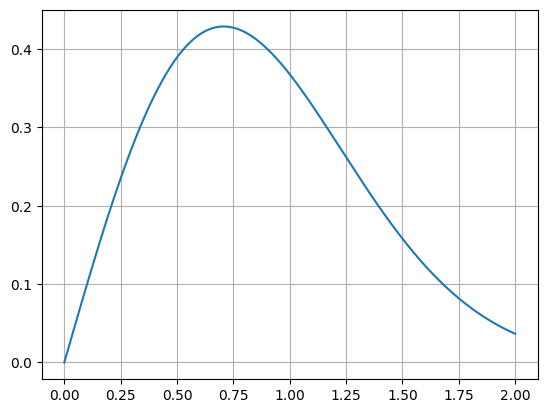

In [105]:
import numpy as np
from matplotlib import pyplot as plt

X = tf.constant(np.linspace(0, 2, 1000), dtype=tf.float32)
Y = X * tf.exp(-X**2)
plt.grid()
plt.plot(X, Y)

In [106]:
# creates a feature matrix from the input tensor X
def make_features(X):
    f1 = tf.ones_like(X)       # Bias term (all ones)
    f2 = X                     # Original feature
    f3 = tf.square(X)          # Square of the feature
    f4 = tf.sqrt(X)            # Square root of the feature
    f5 = tf.exp(X)             # Exponential of the feature
    return tf.stack([f1, f2, f3, f4, f5], axis=1)  # Stack features together

# uses this feature matrix and a weight vector W to compute predictions via matrix multiplication
def predict(X, W):
    return tf.squeeze(X @ W, -1)          # Matrix multiplication and squeeze to 1D

def loss_mse(X, Y, W):
    Y_hat = predict(X, W)
    errors = (Y_hat - Y)**2
    return tf.reduce_mean(errors)

def compute_gradients(X, Y, W):
    with tf.GradientTape() as tape:
        loss = loss_mse(X, Y, W)
    return tape.gradient(loss, W)

In [107]:
STEPS = 2000
LEARNING_RATE = .02

Xf = make_features(X)
n_weights = Xf.shape[1]

W = tf.Variable(np.zeros((n_weights, 1)), dtype=tf.float32)

steps, losses = [], []
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

STEP: 2000 MSE: 0.0023767943494021893


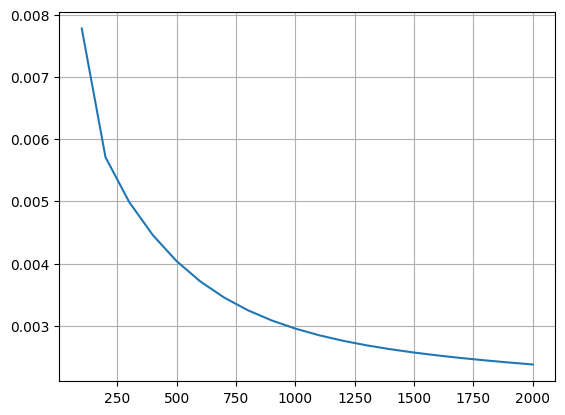

In [108]:
for step in range(1, STEPS + 1):
    dW = compute_gradients(Xf, Y, W)
    W.assign_sub(dW * LEARNING_RATE)

    if step % 100 == 0:
        loss = loss_mse(Xf, Y, W)
        steps.append(step)
        losses.append(loss)
        plt.clf()
        plt.grid()
        plt.plot(steps, losses)

print("STEP: {} MSE: {}".format(STEPS, loss_mse(Xf, Y, W)))

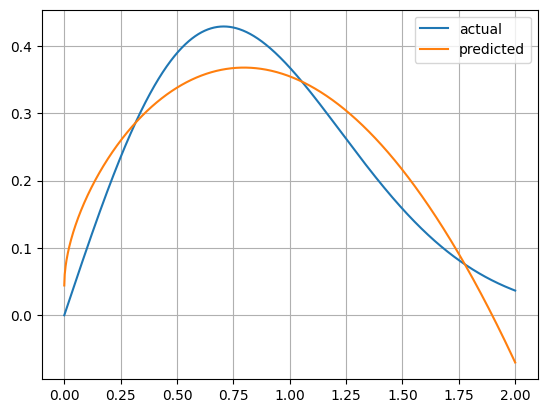

In [109]:
plt.figure()
plt.plot(X, Y, label='actual')
plt.plot(X, predict(Xf, W), label='predicted')
plt.grid()
plt.legend()